# Credrails Competition

This is a simple starter notebook to get started with the Credrails Competition on Zindi.

This notebook covers:

*   Loading the data
*   Simple Exploratory Data Analysis and an example of feature engineering
*   Data preprocessing and data wrangling
*   Creating a simple model
*   Making a submission
*   Some tips for improving your score

## Importing libraries

In [1]:
# Dataframe and Plotting libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

# Machine Learning libraries
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import FeatureHasher
from sklearn.feature_extraction.text import HashingVectorizer,TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

pd.set_option('display.max_columns', None)
# from google.colab import files
import warnings
warnings.filterwarnings('ignore')

## 1. Load the dataset

In [2]:
# Load the files into a Pandas Dataframe
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
ss = pd.read_csv('SampleSubmission.csv')

In [3]:
test.head()

,DATE,TRANSACTION DETAILS,Account_NO,CHQ.NO.,WITHDRAWAL AMT,DEPOSIT AMT,BALANCE AMT,ID
0,2014-02-28,NEFT/FDRL401249530/INDIAFORENSIC,84903292,NaN,0.00,15000000.0,30000000.00,2014-02-28 00:00:00X3000000000
1,2014-02-28,NEFT/FDRL401249533/INDIAFORENSIC,84903292,NaN,0.00,15000000.0,75000000.00,2014-02-28 00:00:00X7500000000
2,2014-03-08,RTGSCHARGESANDSTAX/RAT,84903292,NaN,28.63,0.0,45000028.63,2014-03-08 00:00:00X4500002863
3,2014-03-08,RTGS/YESBH16068986176/INDFOR,84903292,NaN,15000000.00,0.0,60000028.63,2014-03-08 00:00:00X6000002863
4,2014-03-08,RTGSCHARGESANDSTAX/RAT,84903292,NaN,28.63,0.0,60000057.26,2014-03-08 00:00:00X6000005726


In [4]:
train.head()

,DATE,TRANSACTION DETAILS,Account_NO,CHQ.NO.,WITHDRAWAL AMT,DEPOSIT AMT,BALANCE AMT,Category
0,2014-02-28,NEFT/FDRL401249529/INDIAFORENSIC,84903292,NaN,0.0,15000000.0,15000000.0,Money-Transfer
1,2014-02-28,NEFT/FDRL401249532/INDIAFORENSIC,84903292,NaN,0.0,15000000.0,60000000.0,Money-Transfer
2,2014-02-28,NEFT/FDRL401249534/INDIAFORENSIC,84903292,NaN,0.0,15000000.0,90000000.0,Money-Transfer
3,2014-02-28,NEFT/FDRL401249590/INDIAFORENSIC,84903292,NaN,0.0,10000000.0,100000000.0,Money-Transfer
4,2014-02-28,NEFT/FDRL401249531/INDIAFORENSIC,84903292,NaN,0.0,15000000.0,45000000.0,Money-Transfer


In [5]:
# Let’s observe the shape of our datasets.
print('Train data shape :', train.shape)
print('Test data shape :', test.shape)

Train data shape : (57974, 8)
Test data shape : (22625, 8)


The above output shows the number of rows and columns for train and test dataset. We have 7 variables in the train dataset, 7 independent variables and 1 dependent variable. In the test dataset, we have 7 independent variables.

We can observe the first five rows from our data set by using the head() method from the pandas library.

The SampleSubmission.csv gives us an example of what our submission file should look like. This file will contain the unique id column formed by combining date and balance amount columns. 

In [6]:
# View the submission file
ss.head()

,ID,Bank Charges,Bill-Payments,Cash-Pickup,Cell Phone and Airtime,Cheque-Payment,Deposit,Donations,General Purchases,Insurance,Interest,Internet and IT Services,Loan Repayment,Merchant-Payment,Money-Transfer,Professional services,Reversal,Salary and wages,Savings and Investments,Shopping,"Transport, Travel, and Logistics"
0,2014-02-28 00:00:00X3000000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2014-02-28 00:00:00X7500000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2014-03-08 00:00:00X4500002863,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2014-03-08 00:00:00X6000002863,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2014-03-08 00:00:00X6000005726,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 2. Understand the dataset

Let's look at a bar graph of the train data.

<AxesSubplot:>

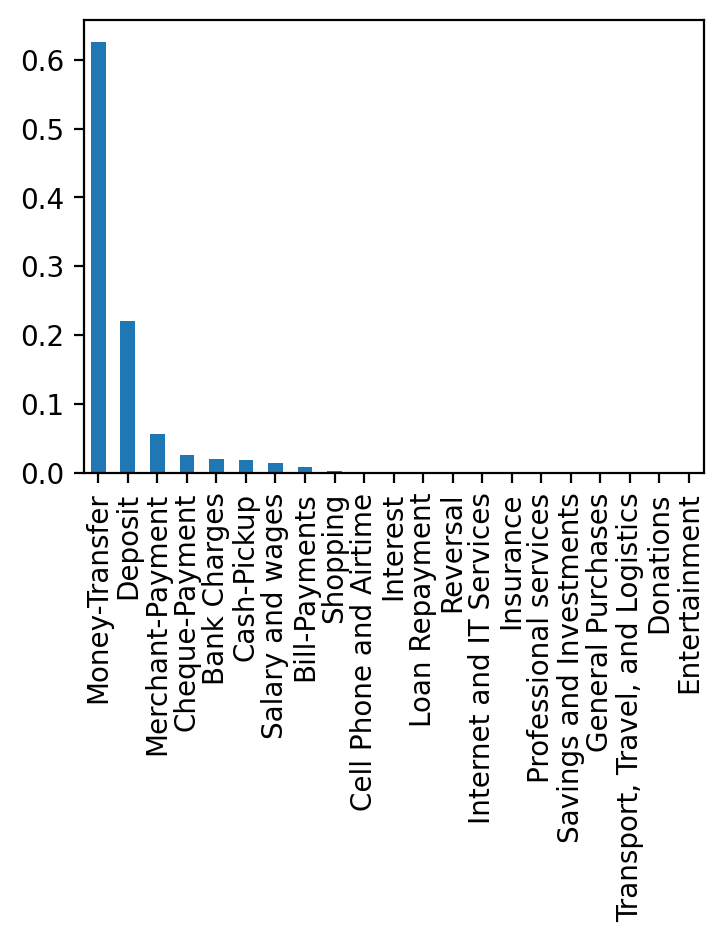

In [7]:
# Show Categoy support
fig,ax=plt.subplots(dpi=200, figsize=(4,3))
#ax.set_xticks(rotation=90)
train.Category.value_counts(normalize=True).plot.bar(ax=ax)

Looks like we have a class imbalance and low support for most of the categories

If you want to learn how to handle missing data in your dataset, we recommend you read [How to Handle Missing Data with Python](https://machinelearningmastery.com/handle-missing-data-python/) by Jason Brownlee.

For more information you can visit the link below.

[Why you need to explore your data and how you can start](https://https://medium.com/analytics-vidhya/why-you-need-to-explore-your-data-how-you-can-start-13de6f29c8c1)

Encode the target labels to values to show a correlation matrix.

In [8]:
# Use a dictionary comprehension and zip to create a dictionary for all the categories in the train data
labels_train = train['Category'].astype('category').cat.categories.tolist()
replace_map_train = {'Category' : {k: v for k,v in zip(labels_train,list(range(1,len(labels_train)+1)))}}
print("Train data: ", replace_map_train)

Train data:  {'Category': {'Bank Charges': 1, 'Bill-Payments': 2, 'Cash-Pickup': 3, 'Cell Phone and Airtime': 4, 'Cheque-Payment': 5, 'Deposit': 6, 'Donations': 7, 'Entertainment': 8, 'General Purchases': 9, 'Insurance': 10, 'Interest': 11, 'Internet and IT Services': 12, 'Loan Repayment': 13, 'Merchant-Payment': 14, 'Money-Transfer': 15, 'Professional services': 16, 'Reversal': 17, 'Salary and wages': 18, 'Savings and Investments': 19, 'Shopping': 20, 'Transport, Travel, and Logistics': 21}}


In [9]:
# Create a copy to use for the correlation matrix (as it only accepts numerical data)
train_data_corr = train.copy()

In [10]:
# Replace the categories with the numerical equivalents from the dictionary
train_data_corr.replace(replace_map_train, inplace=True)

## Correlation matrix

In [11]:
train_data_corr.corr()

,Account_NO,CHQ.NO.,WITHDRAWAL AMT,DEPOSIT AMT,BALANCE AMT,Category
Account_NO,1.000000,0.351361,0.121602,0.076127,0.033356,0.336006
CHQ.NO.,0.351361,1.000000,-0.067754,NaN,0.382381,-0.340006
WITHDRAWAL AMT,0.121602,-0.067754,1.000000,-0.088483,0.118660,0.169217
DEPOSIT AMT,0.076127,NaN,-0.088483,1.000000,0.024830,0.179585
BALANCE AMT,0.033356,0.382381,0.118660,0.024830,1.000000,0.135700
Category,0.336006,-0.340006,0.169217,0.179585,0.135700,1.000000


We can see that not many things are correlated with Category, so it seems like we don't have enough data.

We need to drop empty rows if there are any.

In [ ]:
train = train.dropna(how='all')
test = test.dropna(how='all')

In [13]:
# We can also use the .isnull() method to check for empty values
print('Missing values for Train:', train.isnull().sum())
print('')
print('Missing values for Test:', test.isnull().sum())

Missing values for Train: DATE                       0
TRANSACTION DETAILS     1651
Account_NO                 0
CHQ.NO.                57586
WITHDRAWAL AMT             0
DEPOSIT AMT                0
BALANCE AMT                0
Category                1771
dtype: int64

Missing values for Test: DATE                       0
TRANSACTION DETAILS        0
Account_NO                 0
CHQ.NO.                22504
WITHDRAWAL AMT             0
DEPOSIT AMT                0
BALANCE AMT                0
ID                         0
dtype: int64


Looks like we need to remove the missing categories, they won't help with the model.

CHQ.NO. is mostuly null.

Since TRANSACTION DETAILS is text and the bag of words models can only work on strings we'll need to covert nans to ''

### Empty entries

Remove null categories

In [14]:
train = train[train.Category.notnull()]

In [15]:
# fill na
train['TRANSACTION DETAILS'] = train['TRANSACTION DETAILS'].fillna('')

### Transaction details

Let's take a look at the text column

In [16]:
# get the max words in
train[train['TRANSACTION DETAILS'].notnull()]['TRANSACTION DETAILS'].str.split(' ').apply(len).max()

1

In [17]:
train[train['TRANSACTION DETAILS'].notnull()]['TRANSACTION DETAILS'].str.split(' ')

0        [NEFT/FDRL401249529/INDIAFORENSIC]
1        [NEFT/FDRL401249532/INDIAFORENSIC]
2        [NEFT/FDRL401249534/INDIAFORENSIC]
3        [NEFT/FDRL401249590/INDIAFORENSIC]
4        [NEFT/FDRL401249531/INDIAFORENSIC]
                        ...                
57969       [INDIAFORENSICNFSSETT02-03-201]
57970       [INDIAFORENSICNFSSETT02-03-201]
57971       [INDIAFORENSICNFSSETT02-03-201]
57972       [INDIAFORENSICNFSSETT03-03-201]
57973       [INDIAFORENSICNFSSETT02-03-201]
Name: TRANSACTION DETAILS, Length: 56203, dtype: object

Seems like there are not spaces between the words. This is often done to save space description

<AxesSubplot:ylabel='Frequency'>

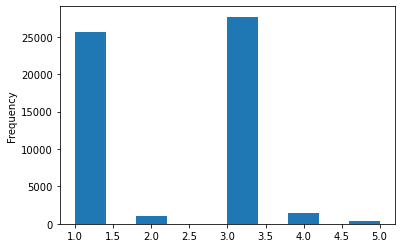

In [18]:
# put spaces between the / since those look like spaces
train[train['TRANSACTION DETAILS'].notnull()]['TRANSACTION DETAILS'].str.split('/').apply(len).plot.hist()

In [19]:
train[train['TRANSACTION DETAILS'].notnull()]['TRANSACTION DETAILS'].str.split('/')

0        [NEFT, FDRL401249529, INDIAFORENSIC]
1        [NEFT, FDRL401249532, INDIAFORENSIC]
2        [NEFT, FDRL401249534, INDIAFORENSIC]
3        [NEFT, FDRL401249590, INDIAFORENSIC]
4        [NEFT, FDRL401249531, INDIAFORENSIC]
                         ...                 
57969         [INDIAFORENSICNFSSETT02-03-201]
57970         [INDIAFORENSICNFSSETT02-03-201]
57971         [INDIAFORENSICNFSSETT02-03-201]
57972         [INDIAFORENSICNFSSETT03-03-201]
57973         [INDIAFORENSICNFSSETT02-03-201]
Name: TRANSACTION DETAILS, Length: 56203, dtype: object

We probably should explore this and other special chariters to parse out the words. But that's out of scope for this Tut

## 3. Data preparation for machine learning

Before you train the model for prediction, you need to perform data [cleaning](https://www.dataquest.io/blog/machine-learning-preparing-data/) and [preprocessing](https://towardsdatascience.com/data-preprocessing-concepts-fa946d11c825). This is a very important step; your model will not perform well without these steps.

The first step is to separate the independent variables and target() from the training data. Then transform the target values from the object data type into numerical.


## 4. Feature Creation, Model Building and Experiments
A portion of the training data set will be used to evaluate our models and find the best one that performs well before using it in the test dataset.

We'll need to create features from the text, numerical, and time data and combine them in a machine readable way.


*    [Introduction to Feature Selection methods with an example (or how to select the right variables?)](https://https://www.analyticsvidhya.com/blog/2016/12/introduction-to-feature-selection-methods-with-an-example-or-how-to-select-the-right-variables/)
*   [The 5 Feature Selection Algorithms every Data Scientist should know](https://towardsdatascience.com/the-5-feature-selection-algorithms-every-data-scientist-need-to-know-3a6b566efd2)
*   [How to Choose a Feature Selection Method For Machine Learning](https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/)
*   [Feature Selection Techniques in Machine Learning with Python](https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e)

In [20]:
# # Split the training data
feature_cols = ['TRANSACTION DETAILS','CHQ.NO.','WITHDRAWAL AMT','DEPOSIT AMT','BALANCE AMT']
X_train, X_val, y_train, y_val = train_test_split(train[feature_cols], train['Category'], test_size=0.3, random_state=101)

Only 30% of the train dataset will be used for evaluating the models. 

There are many models to choose from such as 

*   [K Nearest Neighbors](https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn)
*   [Logistic Regression](https://machinelearningmastery.com/logistic-regression-tutorial-for-machine-learning/)
*   [Random Forest](https://www.datacamp.com/community/tutorials/random-forests-classifier-python)
*   [XGBoost](https://www.datacamp.com/community/tutorials/xgboost-in-python)


Fit models

In [21]:
# make sure validation set has all the categories as training set
print('validation set is missing cols {}'.format(set(y_train.unique()) - set(y_val.unique())))
missing_cols = list(set(y_train.unique()) - set(y_val.unique()))

validation set is missing cols {'Entertainment', 'Donations', 'General Purchases'}


Well need to include this column in a dummy matrix for the log loss metric to work, since both the train and val set need to have the same shape

Let's try a decision tree first

In [22]:
# Creating a Decision tree classifier with a pipeline

### Feature processing and creation on numerical features
numeric_features = ['WITHDRAWAL AMT','DEPOSIT AMT']
numeric_transformer = StandardScaler()

### Feature creation on text features
text_features = 'TRANSACTION DETAILS'
text_transformer = Pipeline(steps=[('vectorizer',TfidfVectorizer(analyzer='char_wb',ngram_range=(1,9))),
                                    ('best',TruncatedSVD(3))
                                  ])
### Todo: Feature creation on Date 


### make reusable preprocessing step
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("text", text_transformer, text_features),
    ],
    sparse_threshold=0
)

### combine with a classifier
model_dtree = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", DecisionTreeClassifier(max_depth=5, random_state=101,
                                     max_features = None, min_samples_leaf=8))]
)


# Training the model on the training dataset
model_dtree.fit(X_train, y_train)

# Predict
y_pred = model_dtree.predict(X_val)
# create dummy matrix of the true
y_val_dummies = pd.get_dummies(pd.concat([y_val, pd.Series([col for col in missing_cols])],ignore_index=True)).iloc[:-len(missing_cols)][model_dtree.classes_]
y_pred_poba = model_dtree.predict_proba(X_val)

# Calculate accuracy
print("ACCURACY OF THE MODEL: ", accuracy_score(y_val, y_pred), 'The log loss of the model:',log_loss(y_val_dummies,y_pred_poba))

# Classification report
print(classification_report(y_val, y_pred))

ACCURACY OF THE MODEL:  0.8650139374888797 The log loss of the model: 1.2062674301209724
                                  precision    recall  f1-score   support

                    Bank Charges       0.00      0.00      0.00       338
                   Bill-Payments       0.92      0.51      0.66       134
                     Cash-Pickup       0.50      0.48      0.49       332
          Cell Phone and Airtime       0.00      0.00      0.00        34
                  Cheque-Payment       0.84      0.75      0.79       401
                         Deposit       0.97      0.99      0.98      3749
                       Insurance       0.00      0.00      0.00         6
                        Interest       0.00      0.00      0.00        16
        Internet and IT Services       0.00      0.00      0.00         9
                  Loan Repayment       0.00      0.00      0.00        24
                Merchant-Payment       0.41      0.49      0.45       963
                  Mone

Let's try random forest with 100 estimators

In [23]:
from sklearn.ensemble import RandomForestClassifier

# Re-use preprocessor but change the model
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", RandomForestClassifier(random_state=101))]
)
 
# Training the model on the training dataset
clf.fit(X_train, y_train)
 
# Performing predictions on the test dataset
y_pred = clf.predict(X_val)
y_val_dummies = pd.get_dummies(pd.concat([y_val, pd.Series([col for col in missing_cols])],ignore_index=True)).iloc[:-len(missing_cols)][clf.classes_]
y_pred_poba = clf.predict_proba(X_val)
# Calculate accuracy
print("ACCURACY OF THE MODEL: ", accuracy_score(y_val, y_pred), 'The log loss of the model:',log_loss(y_val_dummies,y_pred_poba))

# Classification report
print(classification_report(y_val, y_pred))


ACCURACY OF THE MODEL:  0.9285926101654706 The log loss of the model: 0.2363938143741766
                                  precision    recall  f1-score   support

                    Bank Charges       0.84      0.88      0.86       338
                   Bill-Payments       0.98      0.69      0.81       134
                     Cash-Pickup       0.29      0.95      0.44       332
          Cell Phone and Airtime       1.00      0.88      0.94        34
                  Cheque-Payment       0.95      1.00      0.97       401
                         Deposit       1.00      1.00      1.00      3749
                       Insurance       0.83      0.83      0.83         6
                        Interest       1.00      1.00      1.00        16
        Internet and IT Services       1.00      1.00      1.00         9
                  Loan Repayment       1.00      1.00      1.00        24
                Merchant-Payment       0.83      0.96      0.89       963
                  Mone

### 5. Making the first submission

Let’s see how the model performs on the competition test data set provided and how we rank on the competition leaderboard.

First we make predictions on the competition test data set.

In [24]:
# Get the predicted result for the test Data
predictions = pd.DataFrame(clf.predict_proba(test),columns=clf.classes_,index=ss.ID)

In [25]:
predictions

,Bank Charges,Bill-Payments,Cash-Pickup,Cell Phone and Airtime,Cheque-Payment,Deposit,Donations,Entertainment,General Purchases,Insurance,Interest,Internet and IT Services,Loan Repayment,Merchant-Payment,Money-Transfer,Professional services,Reversal,Salary and wages,Savings and Investments,Shopping,"Transport, Travel, and Logistics"
ID,,,,,,,,,,,,,,,,,,,,,
2014-02-28 00:00:00X3000000000,0.00,0.00,0.08,0.0,0.00,0.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.40,0.34,0.00,0.01,0.05,0.0,0.00,0.0
2014-02-28 00:00:00X7500000000,0.00,0.00,0.02,0.0,0.00,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.19,0.71,0.00,0.00,0.05,0.0,0.00,0.0
2014-03-08 00:00:00X4500002863,0.24,0.01,0.07,0.0,0.25,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05,0.15,0.00,0.06,0.00,0.0,0.16,0.0
2014-03-08 00:00:00X6000002863,0.11,0.04,0.00,0.0,0.04,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.12,0.51,0.03,0.05,0.10,0.0,0.00,0.0
2014-03-08 00:00:00X6000005726,0.24,0.01,0.07,0.0,0.25,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05,0.15,0.00,0.06,0.00,0.0,0.16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-16 00:00:00X2455635722,0.00,0.00,0.01,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.96,0.02,0.00,0.00,0.01,0.0,0.00,0.0
2021-04-16 00:00:00X2443135400,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.99,0.00,0.00,0.00,0.01,0.0,0.00,0.0
2021-04-16 00:00:00X6412233,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0


Save results in the CSV file.

In [26]:
# Create the submission csv file
predictions.to_csv('first_submission.csv', index = True)

We named our submission file a first_submission.csv. Now we can upload it to the Zindi competition page by clicking the submit button and selecting the file to upload. You also have an option to add comments for each submission.

## More Tips
- Use date to generate more features
- Thorough EDA and domain knowledge sourcing
- Try char embeddings for descriptions 
- Dataset balancing - oversampling, undersampling, SMOTE...
- Ensembling of models 
- Cross-validation: Group folds, Stratified...